In [ ]:
all_dfs_list = []
subs = [name[:-4] for name in os.listdir(".") if not os.path.isdir(name) and name.find('.csv') != -1]
for sub in subs:
    sub_df = pd.read_csv(sub+'.csv')
    all_dfs_list.append(sub_df)

all_dfs = pd.concat(all_dfs_list)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.io import savemat
import os
import copy
from itertools import tee
import glob

pd.set_option('display.max_columns', 1000)  # or 1000
pd.set_option('display.max_rows', 5000)  # or 1000
pd.set_option('display.max_colwidth', None)  # or 199
output_folder = './output/'


In [ ]:
#all_dfs.groupby(['filename','marker','e_load','m_load','time_point']).agg({'pupil_diam': [lambda x: x.mean(skipna=True)]}).unstack(level=['filename','marker','e_load','m_load'])

In [ ]:
#all_dfs.groupby(['e_load','m_load','time_point']).agg({'pupil_diam': [lambda x: x.mean(skipna=True)]}).unstack(level=['e_load','m_load'])

In [ ]:
#all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': [lambda x: x.mean(skipna=True)]}).unstack(level=['marker','e_load','m_load']).loc[()]['pupil_diam','<lambda>','m_p_stop'].plot.line(title='m_p_stop')

In [ ]:
#all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': [lambda x: x.mean(skipna=True)]}).unstack(level=['marker','e_load','m_load']).loc[(slice(None)),('pupil_diam', '<lambda>',slice(None),2.0, 2.0)].plot.line(figsize=(25,25))

In [ ]:
"""events = ['break_start','session_start','episode_start','episode_stop','e_p_start','e_p_stop','e_r_start','e_r_stop','m_p_start','m_p_stop','m_r_start','m_r_stop']

events = ['episode_start','e_p_start','m_p_start','e_r_start']

data_frames = []
data_frame_names = []

for event in events:
    data_frames.append(all_dfs.groupby(['filename','event_name','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['event_name','e_load','m_load']).loc[()]['pupil_diam',event])
    data_frame_names.append(event)"""

In [ ]:
#high_df = all_dfs.groupby(['filename','event_name','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['event_name','time_point']).loc[(slice(None),2.0,2.0)]

In [ ]:
#high_df

In [ ]:
#high_df.to_excel(os.path.join(output_folder,"high_load_participants.xlsx"))

In [ ]:
#low_df = all_dfs.groupby(['filename','event_name','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['event_name','time_point']).loc[(slice(None),1.0,2.0)]

In [ ]:
#low_df

In [ ]:
#low_df.to_excel(os.path.join(output_folder,'low_load_participants.xlsx'))

## SAVING

In [ ]:
"""events = ['break_start','session_start','episode_start','episode_start_end','e_p_start','e_p_stop','e_r_start','e_r_stop','m_p_start','m_p_stop','m_r_start','m_r_stop']
ordered_list_high = []
ordered_list_low = []
for event in events:
    ordered_list_high.append(high_df[('pupil_diam', event)])
    ordered_list_low.append(low_df[('pupil_diam', event)])"""

In [ ]:
#pd.concat(ordered_list_low,axis=1).to_excel(os.path.join(output_folder,'high_load.xlsx'))

In [ ]:
#pd.concat(ordered_list_low,axis=1).to_excel(os.path.join(output_folder,'low_load.xlsx'))

## PLOTTING

In [ ]:
data_frames = []
data_frame_names = [] # 'break_start','session_start',
events = ['e_p_start','e_p_stop','m_p_start','m_p_stop','m_r_start','m_r_stop','e_r_start','e_r_stop']

for event in events:
    data_frames.append(all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['marker','e_load','m_load']).loc[()]['pupil_diam',event].sort_index(ascending=True))
    data_frame_names.append(event)

ts_df = pd.concat(data_frames).transpose()

In [ ]:
#all_dfs.loc[0:6,('pupil_diam','break_start', 2.0, 2.0)] = np.nan

In [ ]:
"""tmp = all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['marker','e_load','m_load']).sort_index(ascending=True)
tmp = tmp['pupil_diam']
tmp.droplevel(level=2,axis=1)"""

"tmp = all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['marker','e_load','m_load']).sort_index(ascending=True)\ntmp = tmp['pupil_diam']\ntmp.droplevel(level=2,axis=1)"

In [ ]:
#all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).unstack(level=['marker','e_load','m_load']).sort_index(ascending=True)

In [ ]:
base_line = all_dfs.groupby(['marker','time_point']).agg({'pupil_diam': lambda x: x.mean(skipna=True)}).loc['base_line'].values
base_line_vals = []
for i in range(len(base_line)):
    base_line_vals.append(base_line[i][0])

high_array = np.concatenate((base_line_vals,ts_df.loc[(2.0,2.0)].to_list()))
low_array = np.concatenate((base_line_vals,ts_df.loc[(1.0,2.0)].to_list()))

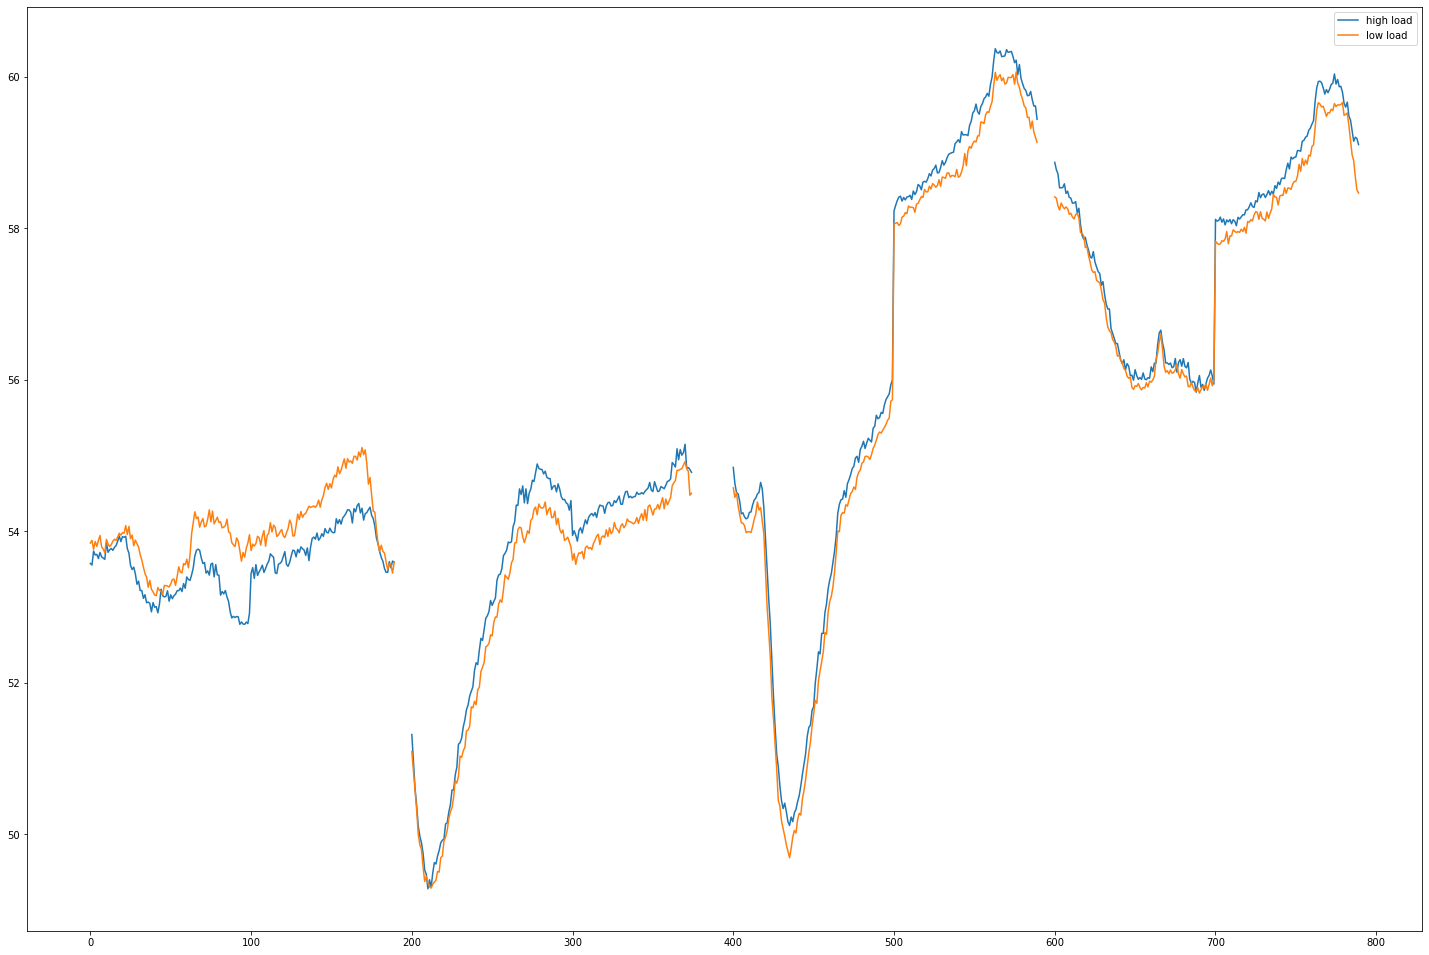

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize=(25, 17))
plt.plot(ts_df.loc[(2.0,2.0)].to_list())
plt.plot(ts_df.loc[(1.0,2.0)].to_list())
"""plt.plot(high_array)
plt.plot(low_array)"""
plt.legend(['high load', 'low load'])
plt.show()
plt.savefig('my_plot.png')


In [ ]:
plt.figure(figsize=(25, 17))
"""plt.plot(ts_df.loc[(2.0,2.0)].to_list())
plt.plot(ts_df.loc[(1.0,2.0)].to_list())"""
plt.plot(high_array)
plt.plot(low_array)
plt.legend(['high load', 'low load'])
plt.show()
plt.savefig('my_plot.png')


In [ ]:
import matplotlib.patches as mpatches
import pandas as pd
import matplotlib.pyplot as plt

colors_map = {'Winter': 'b',
              'Spring': 'pink',
              'Summer': 'y',
              'Fall': 'orange'}

sale = [10, 20, 30, 40, 43, 46, 49, 50, 60, 70, 80, 90, 100, 110, 120, 130]
season = ['Winter'] * 7 + ['Spring'] * 3 + ['Summer'] * 3 + ['Fall'] * 3
ind = pd.concat([pd.DataFrame(pd.date_range(start='2020-1-1', periods=7, freq='W')),
                 pd.DataFrame(pd.date_range(start='2020-4-1', periods=9, freq='MS'))]).values.reshape((16,))

df = pd.DataFrame({
    'Sale': sale,
    'Season': season },
    index=ind,
)

# get index change season
season_changed = df.index[df['Season'].ne(df['Season'].shift())].tolist()

# Create the figure
fig, ax = plt.subplots()
# iterate over each season - year
for start, end, season in zip(season_changed,
                              season_changed[1:]+[df.index[-1]],
                              df.loc[season_changed, 'Season']):
    df.loc[start:end, 'Sale'].plot(ax=ax, c=colors_map[season])

# define the legend
handles = [mpatches.Patch(color=val, label=key)
           for key, val in colors_map.items()]
plt.legend(handles=handles, loc='best')

plt.plot()

In [ ]:
#ts_df.columns = [''] * len(ts_df.columns)

In [ ]:
#ts_df.loc[(2.0,2.0)].to_csv('high_load.csv')

In [ ]:
#all_dfs.groupby(['marker','e_load','m_load','time_point']).agg({'pupil_diam': [lambda x: x.mean(skipna=True)]}).unstack(level=['marker','e_load','m_load']).loc[()]['pupil_diam','<lambda>','e_p_start']

In [ ]:
"""import pandas as pd
import numpy as np
import math

df=pd.DataFrame({'Class': ['A1','A1','A1','A2','A3','A3'],
                 'Force': [50,150,100,120,140,160] },
                 columns=['Class', 'Force'])
print(df)
print('-'*30)

stats = df.groupby(['Class'])['Force'].agg(['mean', 'count', 'std'])
print(stats)
print('-'*30)

ci95_hi = []
ci95_lo = []

for i in stats.index:
    m, c, s = stats.loc[i]
    ci95_hi.append(m + 1.96*s/math.sqrt(c))
    ci95_lo.append(m - 1.96*s/math.sqrt(c))

stats['ci95_hi'] = ci95_hi
stats['ci95_lo'] = ci95_lo
print(stats)"""